In [1]:
import numpy as np
import pandas as pd

data_raw = pd.read_parquet("vhrdata").drop_duplicates(subset=None, keep='last', inplace=False)
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207576 entries, 0 to 3207575
Data columns (total 46 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   vin                       object 
 1   collect_ts                int64  
 2   uuid                      object 
 3   model_name                object 
 4   series_code               object 
 5   msg_create_time           object 
 6   vcu_VehicleMode           float32
 7   vcu_vehicleSpeed          float32
 8   VCU_VehicleSpeedValid     float32
 9   vcu_state                 float32
 10  bms_SOC                   float32
 11  bms_state                 float32
 12  BCM_ebs_U_BATT            float32
 13  BCM_ebs_SOC               float32
 14  BCM_ebs_SOH_SUL           float32
 15  BCM_ebs_SOC_STATE         float32
 16  BCM_ebs_SOH_SUL_STATE     float32
 17  bcm_12VBatterySOC         float32
 18  dcdc_realOutputVoltage    float32
 19  dcdc_realOutputCurrent    float32
 20  DCDC_AlerState          

C:\Users\696292\AppData\Local\Temp\ipykernel_23464\2196925817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_raw[data_raw.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)


<Axes: xlabel='bms_SOC'>

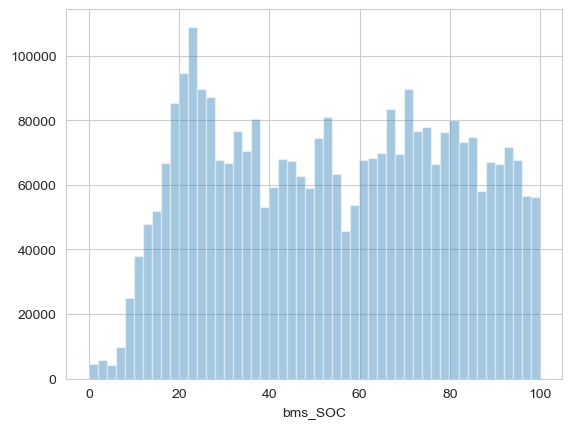

In [7]:
import seaborn as sns

sns.distplot(data_raw[data_raw.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)

In [ ]:
data_raw.head(20)

In [2]:
# 填充操作
data= data_raw[data_raw.vin == 'LM8F7D791NA047269'].fillna(method='ffill').sort_values(by="collect_ts")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23933 entries, 610440 to 2324354
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       23933 non-null  object 
 1   collect_ts                23933 non-null  int64  
 2   uuid                      23933 non-null  object 
 3   model_name                23933 non-null  object 
 4   series_code               23933 non-null  object 
 5   msg_create_time           23933 non-null  object 
 6   vcu_VehicleMode           23933 non-null  float32
 7   vcu_vehicleSpeed          23933 non-null  float32
 8   VCU_VehicleSpeedValid     23933 non-null  float32
 9   vcu_state                 23933 non-null  float32
 10  bms_SOC                   23933 non-null  float32
 11  bms_state                 23933 non-null  float32
 12  BCM_ebs_U_BATT            23924 non-null  float32
 13  BCM_ebs_SOC               23924 non-null  float32
 14  BCM_

C:\Users\696292\AppData\Local\Temp\ipykernel_23464\3407701775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)


<Axes: xlabel='bms_SOC'>

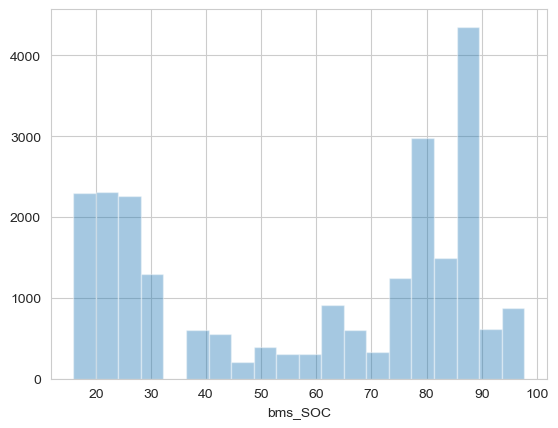

In [9]:
import seaborn as sns

sns.distplot(data[data.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)

In [3]:
data = data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 18.)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23924 entries, 610440 to 2324354
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       23924 non-null  object 
 1   collect_ts                23924 non-null  int64  
 2   uuid                      23924 non-null  object 
 3   model_name                23924 non-null  object 
 4   series_code               23924 non-null  object 
 5   msg_create_time           23924 non-null  object 
 6   vcu_VehicleMode           23924 non-null  float32
 7   vcu_vehicleSpeed          23924 non-null  float32
 8   VCU_VehicleSpeedValid     23924 non-null  float32
 9   vcu_state                 23924 non-null  float32
 10  bms_SOC                   23924 non-null  float32
 11  bms_state                 23924 non-null  float32
 12  BCM_ebs_U_BATT            23924 non-null  float32
 13  BCM_ebs_SOC               23924 non-null  float32
 14  BCM_

In [ ]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

In [ ]:
import matplotlib.pyplot as plt
data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 11.)].BCM_ebs_U_BATT.hist(bins=12, figsize=(5,3))
plt.show()

In [4]:
data_copy = data.copy()

data_copy['date'] = pd.to_datetime(data_copy["collect_ts"], unit='ms')

data_copy = data_copy.set_index("date")
data_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,bms_pLimitDrive,bms_pLimitRegen,bcm_HvOnRequest,esc_vehicleSpeed,esc_vehicleSpeedValid,ac_ambientTemp,ac_ambientTempValid,vcu_highVoltageIndicator,bcm_HvOffRequest,BCM_EBS_State
date,,,,,,,,,,,,,,,,,,,,,
2023-04-16 03:11:16.725,LM8F7D791NA047269,1681614676725,LM8F7D791NA047269#1682417954920#4508,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682417954848,1.0,0.000000,0.0,1.0,...,0.00,0.0,0.0,0.000000,1.0,23.0,1.0,0.0,0.0,0.0
2023-04-16 03:11:17.725,LM8F7D791NA047269,1681614677725,LM8F7D791NA047269#1682417954920#4508,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682417954848,1.0,0.000000,0.0,1.0,...,0.00,0.0,0.0,0.000000,1.0,23.0,1.0,0.0,0.0,0.0
2023-04-16 03:11:18.725,LM8F7D791NA047269,1681614678725,LM8F7D791NA047269#1682417954920#4508,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682417954848,1.0,0.000000,0.0,1.0,...,0.00,0.0,0.0,0.000000,1.0,23.0,1.0,0.0,0.0,0.0
2023-04-16 03:11:19.725,LM8F7D791NA047269,1681614679725,LM8F7D791NA047269#1682417954920#4508,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682417954848,1.0,0.000000,0.0,1.0,...,0.00,0.0,0.0,0.000000,1.0,23.0,1.0,0.0,0.0,0.0
2023-04-16 03:11:20.725,LM8F7D791NA047269,1681614680725,LM8F7D791NA047269#1682417954920#4508,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682417954848,1.0,0.000000,0.0,1.0,...,0.00,0.0,0.0,0.000000,1.0,23.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25 07:39:13.322,LM8F7D791NA047269,1682408353322,LM8F7D791NA047269#1682455120847#7913,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682455120768,1.0,53.775002,0.0,0.0,...,193.50,-150.5,0.0,53.775002,1.0,20.5,1.0,1.0,0.0,0.0
2023-04-25 07:39:14.322,LM8F7D791NA047269,1682408354322,LM8F7D791NA047269#1682455120847#7913,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682455120768,1.0,54.731251,0.0,0.0,...,193.50,-150.5,0.0,54.731251,1.0,20.5,1.0,1.0,0.0,0.0
2023-04-25 07:39:15.322,LM8F7D791NA047269,1682408355322,LM8F7D791NA047269#1682455120847#7913,赛力斯X1_2022_两驱标准版_B24ERR6JF2L00,SERES-X1,1682455120768,1.0,54.956249,0.0,0.0,...,193.25,-150.5,0.0,54.956249,1.0,20.5,1.0,1.0,0.0,0.0


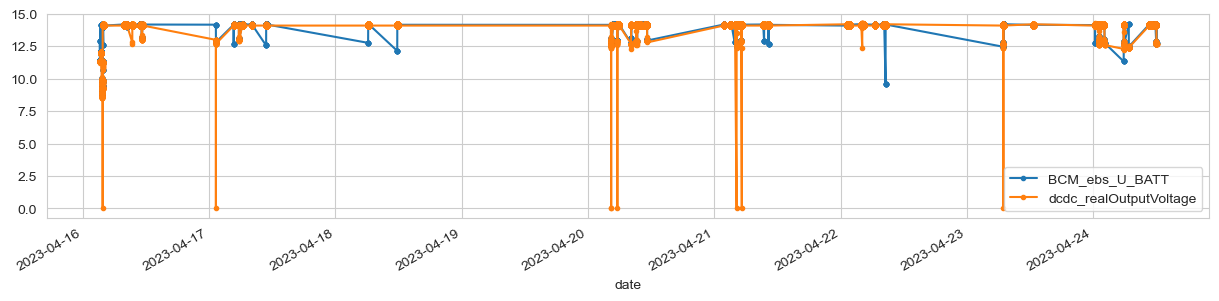

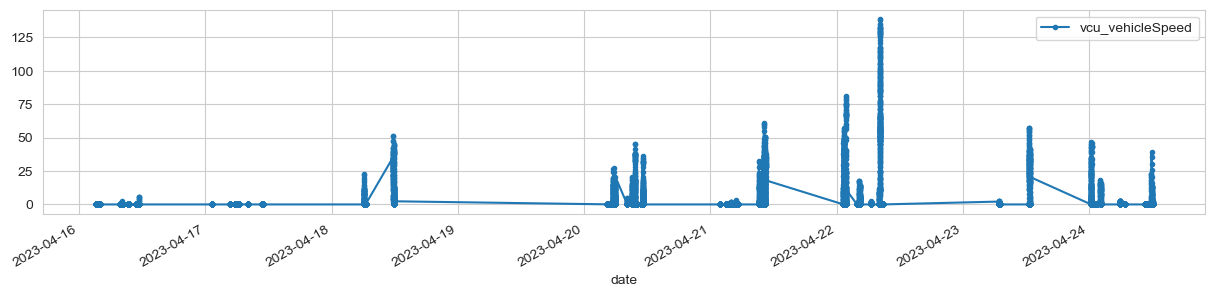

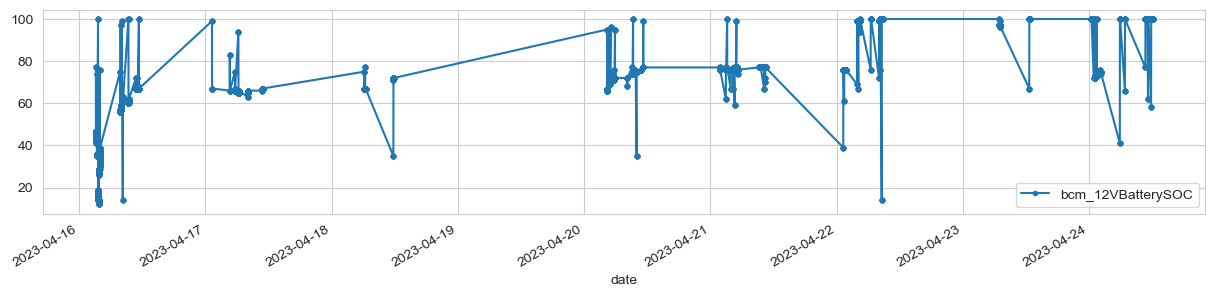

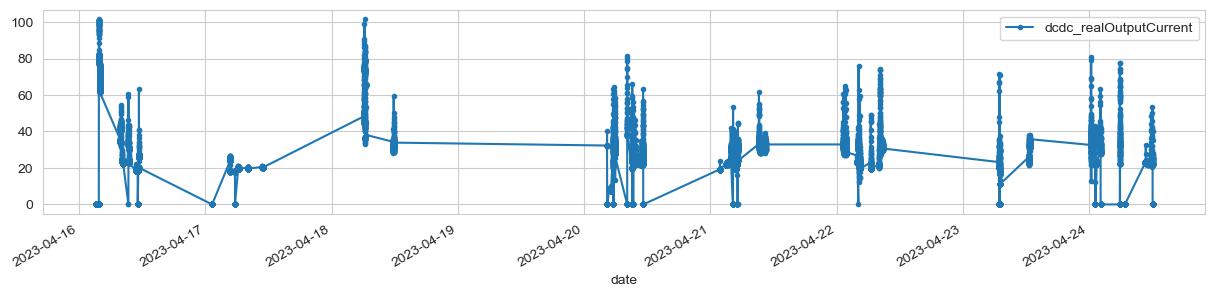

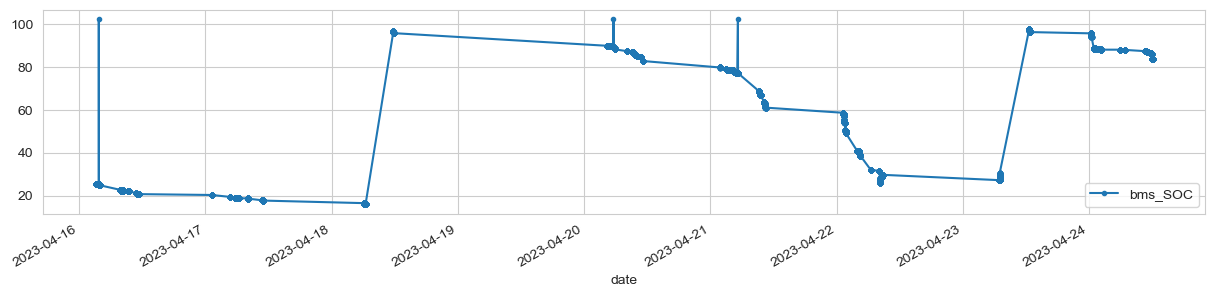

In [5]:
import matplotlib.pyplot as plt

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bcm_12VBatterySOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

1. DC-DC 有输出的前提是高压上电
2. 当 DC-DC 有输出时，小电瓶电压会很快和其保持一致
3.

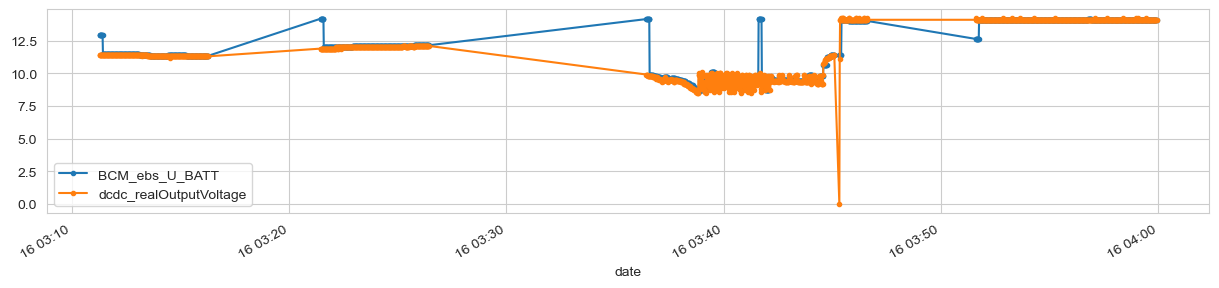

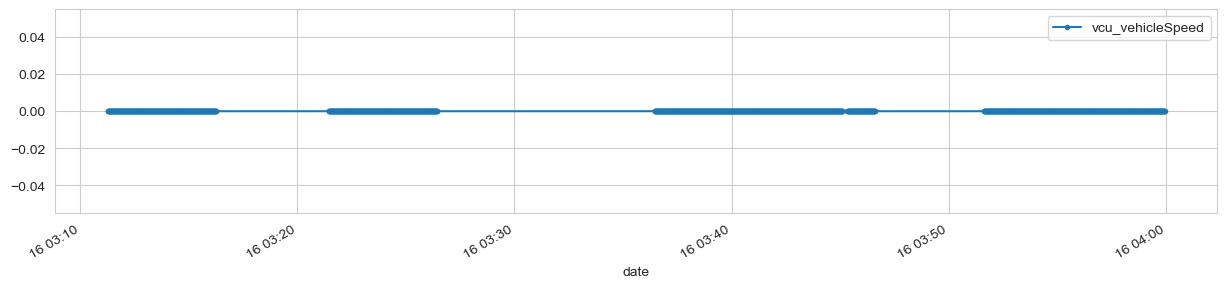

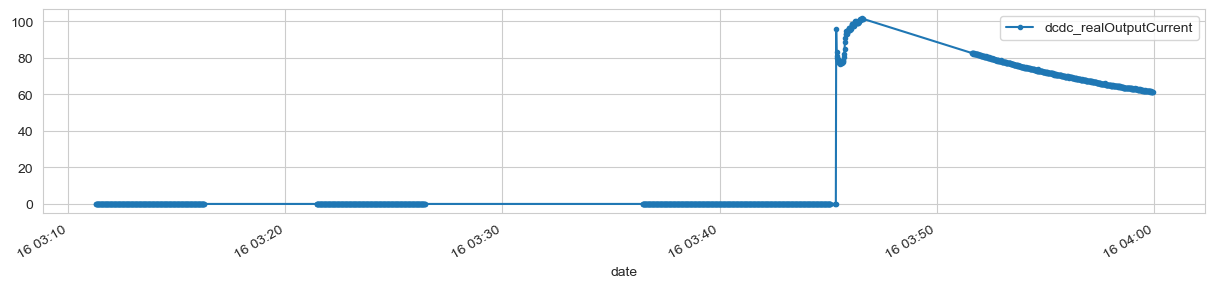

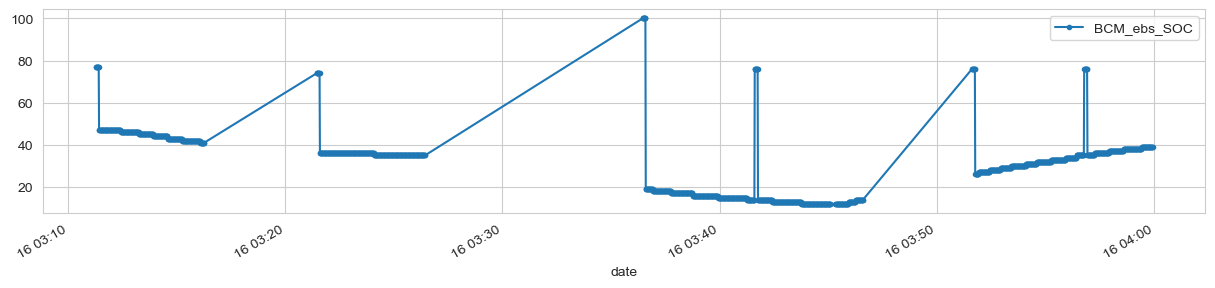

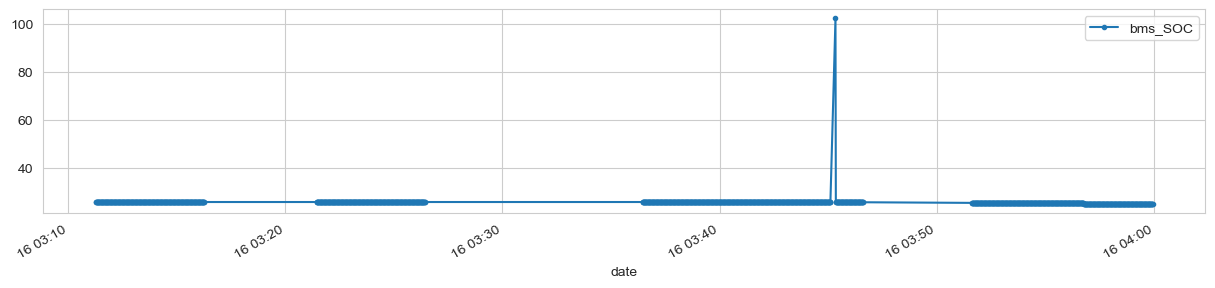

In [11]:
import matplotlib.pyplot as plt

data_copy["2023-04-16 00:00:00":"2023-04-16 04:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-16 00:00:00":"2023-04-16 04:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-16 00:00:00":"2023-04-16 04:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-16 00:00:00":"2023-04-16 04:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-16 00:00:00":"2023-04-16 04:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()